# FIFA 21 Players Data Analysis and Visualization

## Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read file

In [2]:
url = 'https://storage.googleapis.com/rg-ai-bootcamp/assignment-1/fifa21_raw_data.csv'
fifa_df = pd.read_csv(url)
fifa_df

<ipython-input-2-c7b0225d7666>:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv(url)


,Unnamed: 0,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,562
2,2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,207
4,4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


## Data Cleaning

In [3]:
# 01. Removing the 'Unnamed: 0' Column

fifa_df = fifa_df.drop(columns=['Unnamed: 0'])

print(fifa_df.columns)

Index(['ID', 'Name', 'LongName', 'Nationality', 'Age', '↓OVA', 'POT', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')


In [5]:
# 02. Removing the Newline Characters

fifa_df = fifa_df.replace('\n','', regex=True)

print(fifa_df['Club'].head())

0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object


In [6]:
# 03. Removing 'Star' Characters

fifa_df = fifa_df.replace('★','', regex=True)

print(fifa_df[['W/F', 'SM', 'IR']].head())

  W/F SM  IR
0  4   4  5 
1  4   5  5 
2  3   1  3 
3  5   4  4 
4  5   5  5 


In [7]:
# 04. Filling Missing Values

fifa_df = fifa_df.fillna({
    'Loan Date End': 'Not on Loan',
    'Hits': 'Unknown'
})

print(fifa_df[['Loan Date End', 'Hits']].tail())

      Loan Date End     Hits
18974   Not on Loan  Unknown
18975   Not on Loan  Unknown
18976   Not on Loan  Unknown
18977   Not on Loan  Unknown
18978   Not on Loan  Unknown


In [8]:
# 05. Cleaning and Converting Financial Data

cols = ['Wage', 'Value', 'Release Clause']

fifa_df[cols] = fifa_df[cols].replace('€', '', regex=True)

def convert(price):
  if 'K' in price:
    price = price.replace('K', '')
    return int(float(price) * 1000)
  elif 'M' in price:
    price = price.replace('M', '')
    return int(float(price) * 1000000)
  return int(price)

for col in cols:
    fifa_df[col] = fifa_df[col].apply(convert)

print(fifa_df[['Name', 'Value', 'Wage', 'Release Clause']].head())

                Name      Value    Wage  Release Clause
0           L. Messi  103500000  560000       138400000
1  Cristiano Ronaldo   63000000  220000        75900000
2           J. Oblak  120000000  125000       159400000
3       K. De Bruyne  129000000  370000       161000000
4          Neymar Jr  132000000  270000       166500000


## Data Visualization

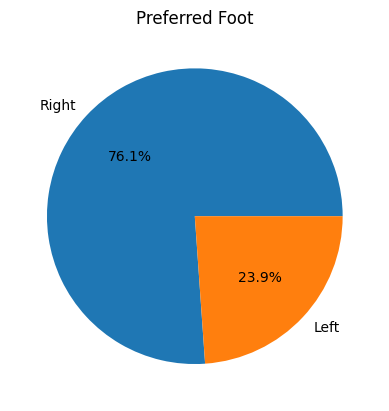

In [9]:
# 06. Pie Chart Creation - Preferred Foot

preferred_foot_counts = fifa_df['Preferred Foot'].value_counts()
preferred_foots = preferred_foot_counts.index
counts = preferred_foot_counts.values

plt.pie(counts, labels=preferred_foots, autopct='%1.1f%%')
plt.title('Preferred Foot')
plt.show()

       ID               Name                      LongName Nationality  Age  \
0  158023           L. Messi                  Lionel Messi   Argentina   33   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro    Portugal   35   
2  200389           J. Oblak                     Jan Oblak    Slovenia   27   
3  192985       K. De Bruyne               Kevin De Bruyne     Belgium   29   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.      Brazil   28   
5  188545     R. Lewandowski            Robert Lewandowski      Poland   31   

   ↓OVA  POT                 Club     Contract   Positions  ...     A/W  \
0    93   93         FC Barcelona  2004 ~ 2021  RW, ST, CF  ...  Medium   
1    92   92             Juventus  2018 ~ 2022      ST, LW  ...    High   
2    91   93      Atlético Madrid  2014 ~ 2023          GK  ...  Medium   
3    91   91      Manchester City  2015 ~ 2023     CAM, CM  ...    High   
4    91   91  Paris Saint-Germain  2017 ~ 2022     LW, CAM  ...    High

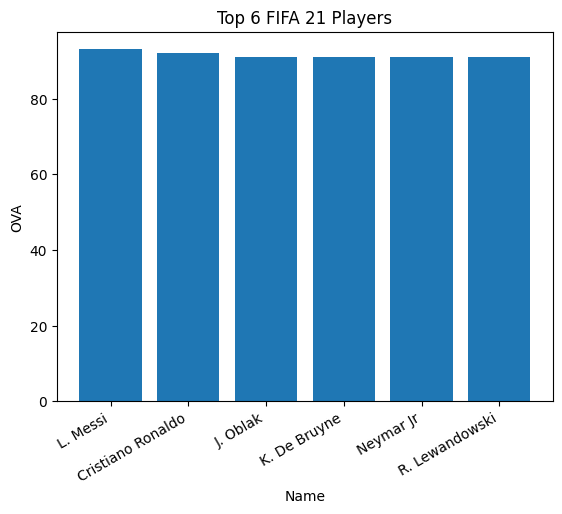

In [12]:
# 07. Bar Plot Creation - Top 6 Players

top_six_players = fifa_df.sort_values(by='↓OVA', ascending=False).head(6)
print(top_six_players)

plt.bar(top_six_players['Name'], top_six_players['↓OVA'])
plt.xlabel('Name')
plt.ylabel('OVA')
plt.title('Top 6 FIFA 21 Players')
plt.xticks(rotation=30, ha='right')
plt.show()

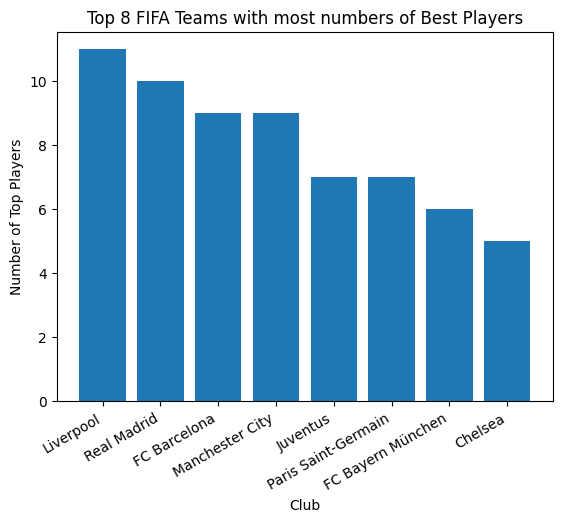

In [16]:
# 08. Bar Plot Creation - Top 8 Teams with Best Players

top_100_players = fifa_df.sort_values(by='↓OVA', ascending=False).head(100)

club_counts = top_100_players['Club'].value_counts()
# print(club_counts)

top_8_clubs = club_counts.head(8)

plt.bar(top_8_clubs.index, top_8_clubs.values)
plt.xlabel('Club')
plt.ylabel('Number of Top Players')
plt.title('Top 8 FIFA Teams with most numbers of Best Players')
plt.xticks(rotation=30, ha='right')
plt.show()

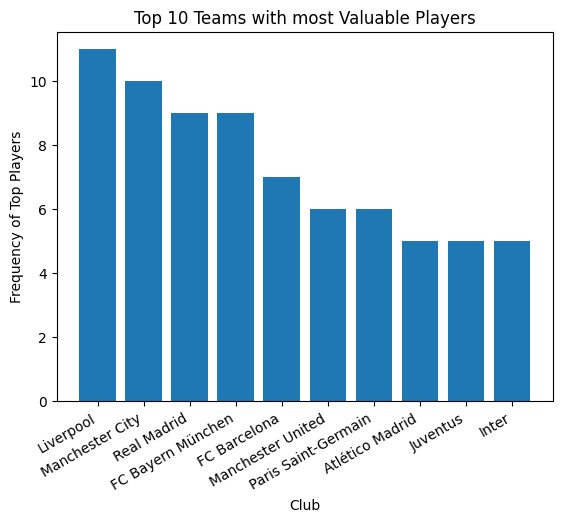

In [17]:
# 09. Bar Plot Creation - Top 10 Teams with most Valuable Players

top_100_valueable_players = fifa_df.sort_values(by='Value', ascending=False).head(100)
# print(top_100_valueable_players['Value'])

valueable_club_counts = top_100_valueable_players['Club'].value_counts()
# print(valueable_club_counts)

top_10_clubs = valueable_club_counts.head(10)

plt.bar(top_10_clubs.index, top_10_clubs.values)
plt.xlabel('Club')
plt.ylabel('Frequency of Top Players')
plt.title('Top 10 Teams with most Valuable Players')
plt.xticks(rotation=30, ha='right')
plt.show()


High Value Threshold: 2000000
Low Wage Threshold: 1000
                Name  Wage     Value
346          Ismaily  1000  22000000
372     D. Livaković   900  24500000
373     V. Tsygankov  1000  34000000
507    Júnior Moraes  1000  11000000
588          José Sá  1000  16000000
...              ...   ...       ...
8875         K. Koné  1000   2000000
9013      A. Vranckx   600   2300000
9019   Tomás Esteves  1000   2100000
9154      N. Fröling  1000   2100000
10618       Y. Demir   950   2200000

[275 rows x 3 columns]


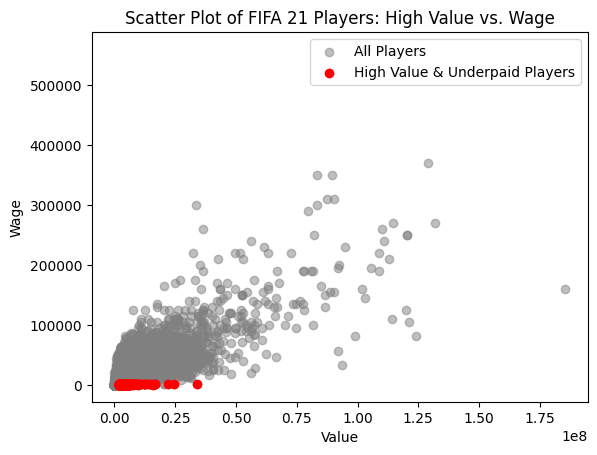

In [18]:
# 10. Scatter Plot Creation - High Value, Underpaid Players

total_rows = len(fifa_df)
twenty_five_percent_rows = int(total_rows * 0.25)
# print(twenty_five_percent_rows, total_rows)

high_value_threshold = fifa_df.sort_values(by='Value', ascending=False).head(twenty_five_percent_rows)['Value'].min()
low_wage_threshold = fifa_df.sort_values(by='Wage').head(twenty_five_percent_rows)['Wage'].max()

print(f"High Value Threshold: {high_value_threshold}")
print(f"Low Wage Threshold: {low_wage_threshold}")

# Identify high value but underpaid players
high_value_underpaid_players = fifa_df[(fifa_df['Value'] >= high_value_threshold) & (fifa_df['Wage'] <= low_wage_threshold)]
print(high_value_underpaid_players[['Name', 'Wage', 'Value']])

# Plot all players
plt.scatter(fifa_df['Value'], fifa_df['Wage'], color='gray', label='All Players', alpha=0.5)

# Plot high value but underpaid players
plt.scatter(high_value_underpaid_players['Value'], high_value_underpaid_players['Wage'], color='red', label='High Value & Underpaid Players')

plt.xlabel('Value')
plt.ylabel('Wage')
plt.title('Scatter Plot of FIFA 21 Players: High Value vs. Wage')
plt.legend()
plt.show()